In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
#url = 'https://gist.githubusercontent.com/johnburnmurdoch/4199dbe55095c3e13de8d5b2e5e5307a/raw/fa018b25c24b7b5f47fd0568937ff6c04e384786/city_populations'

data = 'data/city_population_year_data.csv'

df = pd.read_csv(data, usecols=['name', 'group', 'year', 'value'])
df.head(3)

name  group  year  value
0  Agra  India  1575  200.0
1  Agra  India  1576  212.0
2  Agra  India  1577  224.0

In [3]:
colors = dict(zip(
    ["India", "Europe", "Asia", "Latin America", "Middle East", "North America", "Africa"],
    ["#adb0ff", "#ffb3ff", "#90d595", "#e48381", "#aafbff", "#f7bb5f", "#eafb50"]
))
group_lk = df.set_index('name')['group'].to_dict()

In [21]:
current_year = 2019

dff = df[df['year'].eq(current_year)].sort_values(by='value', ascending=True).tail(10)
dff.head()

name          group  year    value
1196        Cairo    Middle East  2019  20208.8
1337        Dhaka           Asia  2019  20310.8
4680        Osaka           Asia  2019  20466.0
3575  Mexico City  Latin America  2019  21694.2
5446    Sao Paulo  Latin America  2019  21908.4

In [17]:
dff

name          group  year    value
1196        Cairo    Middle East  2019  20208.8
1337        Dhaka           Asia  2019  20310.8
4680        Osaka           Asia  2019  20466.0
3575  Mexico City  Latin America  2019  21694.2
5446    Sao Paulo  Latin America  2019  21908.4
3749       Mumbai          India  2019  22479.0
690       Beijing           Asia  2019  23437.6
5548     Shanghai           Asia  2019  26457.8
1325        Delhi          India  2019  28619.0
6046        Tokyo           Asia  2019  38258.6

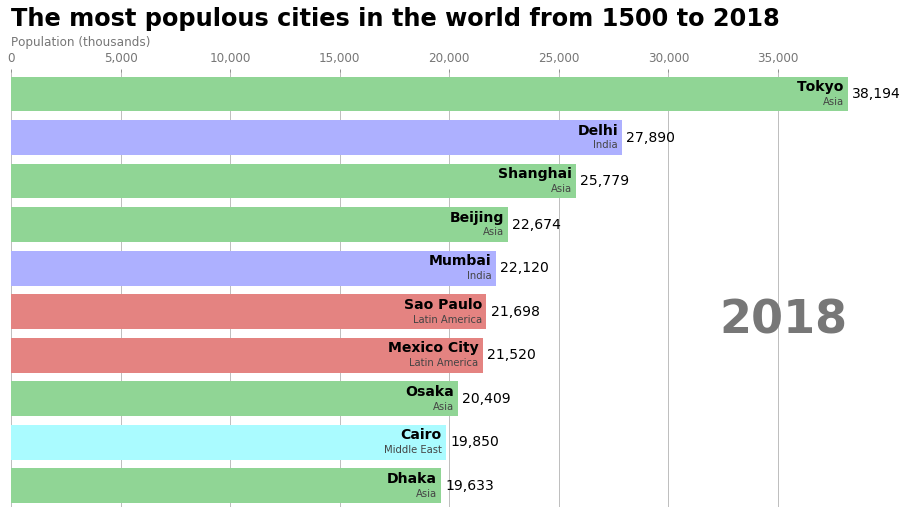

In [5]:
fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(current_year):
    dff = df[df['year'].eq(current_year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, current_year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'The most populous cities in the world from 1500 to 2018',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    #ax.text(1, 0, 'by @pratapvardhan; credit @jburnmurdoch', transform=ax.transAxes, color='#777777', ha='right',
    #        bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2018)

MovieWriter ffmpeg unavailable. Trying to use pillow instead.


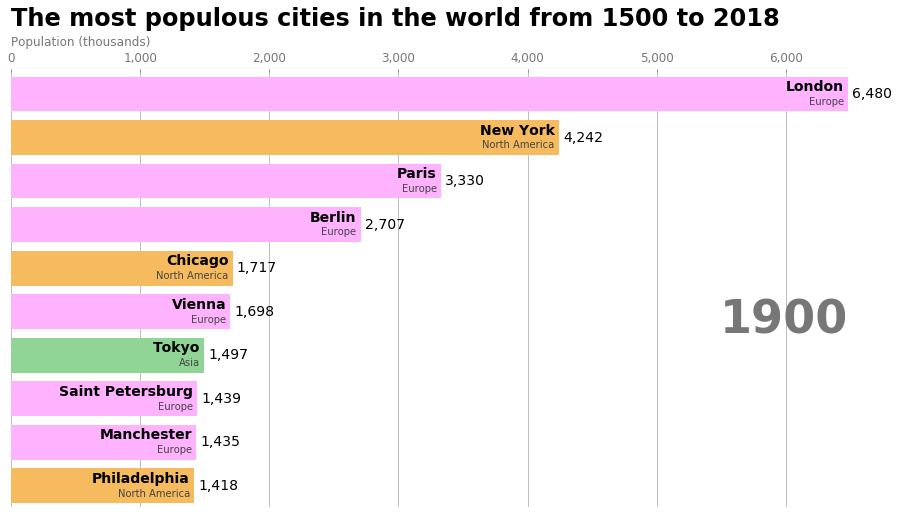

In [6]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1900, 2019), blit=False, interval=100, repeat=True,  save_count=1000)
animator.save('world_populations_example.gif')
HTML(animator.to_jshtml())

#ani = animation.FuncAnimation(fig, run, frames=data_gen, blit=False, interval=10, repeat=False, init_func=init, save_count=1000)

MovieWriter ffmpeg unavailable. Trying to use pillow instead.


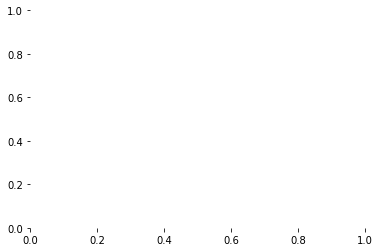

In [7]:
# or use animator.to_html5_video() or animator.save() 
animator.save('world_populations_example.gif')